In [27]:
import pandas as pd

# Đường dẫn tới file CSV
file_path = "./reviews.csv"

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị dữ liệu
print(df.head())  # In ra 5 hàng đầu tiên của DataFrame


   user_id  product_id  score  \
0        7           4      3   
1       53          31      4   
2       11          14      3   
3       49          14      3   
4        8           9      5   

                                             comment  \
0  Chất lượng của sản phẩm vượt xa mong đợi của t...   
1  Đó là một lựa chọn tuyệt vời cho thú cưng của ...   
2  Sản phẩm này thực sự là một điều cần thiết cho...   
3  Tôi đã giới thiệu sản phẩm này cho nhiều bạn b...   
4  Tôi đã dành rất nhiều thời gian để tìm kiếm sả...   

                    createdAt                  updatedAt       id  
0  2024-01-02 05:42:48.983148  2024-05-01 03:19:13.79401  2113415  
1  2024-03-17 11:32:27.075948  2024-05-01 03:19:13.79401  2113416  
2  2024-02-24 04:17:19.933548  2024-05-01 03:19:13.79401  2113417  
3  2024-02-10 05:12:59.725548  2024-05-01 03:19:13.79401  2113418  
4  2024-02-15 01:31:12.656748  2024-05-01 03:19:13.79401  2113419  


In [28]:
df = df[['user_id', 'product_id', 'score']]
df.head()

,user_id,product_id,score
0,7,4,3
1,53,31,4
2,11,14,3
3,49,14,3
4,8,9,5


In [29]:
import numpy as np

# Tạo dữ liệu giả mạo
fake_user_ids = np.random.randint(64, 1064, size=1000)
fake_product_ids = np.random.randint(108, 1108, size=1000)
fake_scores = np.random.randint(3, 6, size=1000)

# Tạo DataFrame mới từ dữ liệu giả mạo
fake_data = pd.DataFrame({
    'user_id': fake_user_ids,
    'product_id': fake_product_ids,
    'score': fake_scores
})

# Thêm dữ liệu giả vào DataFrame hiện tại
df = pd.concat([df, fake_data], ignore_index=True)

# In ra 5 dòng đầu tiên của DataFrame sau khi thêm dữ liệu giả
print(df.head())


   user_id  product_id  score
0        7           4      3
1       53          31      4
2       11          14      3
3       49          14      3
4        8           9      5


In [30]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity


from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds # for sparse matrices

In [31]:
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  1139
No of columns =  3


Datatypes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     1139 non-null   int64
 1   product_id  1139 non-null   int64
 2   score       1139 non-null   int64
dtypes: int64(3)
memory usage: 26.8 KB


In [33]:
df.describe

<bound method NDFrame.describe of       user_id  product_id  score
0           7           4      3
1          53          31      4
2          11          14      3
3          49          14      3
4           8           9      5
...       ...         ...    ...
1134      856        1094      4
1135      133         660      3
1136      203         518      4
1137      400         325      5
1138      373         607      3

[1139 rows x 3 columns]>

In [34]:
df.isna().sum()

user_id       0
product_id    0
score         0
dtype: int64

In [35]:
# Summary statistics of 'rating' variable
df['score'].describe()

count    1139.000000
mean        4.055312
std         0.814799
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: score, dtype: float64

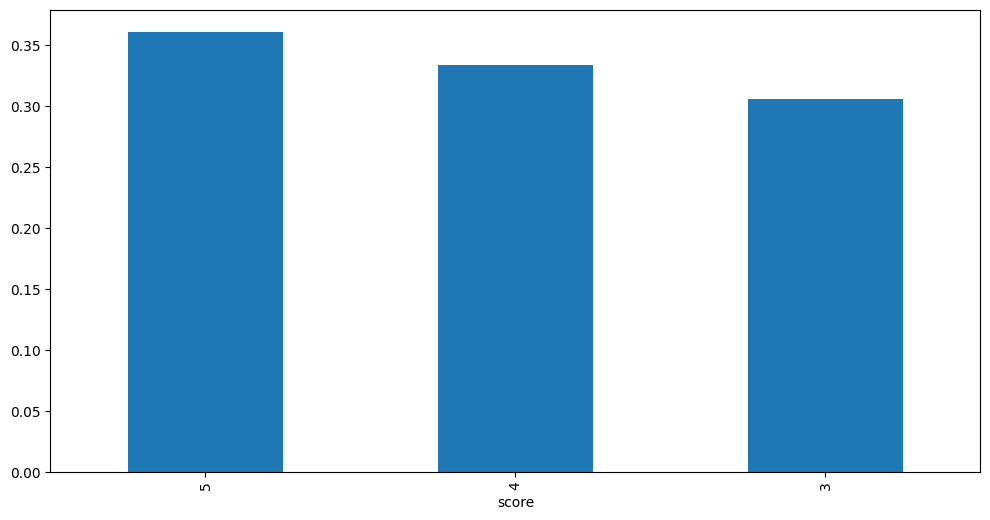

In [36]:
#Create the plot and provide observations

plt.figure(figsize = (12,6))
df['score'].value_counts(1).plot(kind='bar')
plt.show()

In [37]:
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['product_id'].nunique())

Number of unique USERS in Raw data =  678
Number of unique ITEMS in Raw data =  698


In [38]:
# Top 10 users based on rating
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated


user_id
52      6
815     6
62      6
32      6
559     6
63      5
1008    5
904     5
886     5
868     5
dtype: int64

In [39]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 5].index)]
df_final.head()

,user_id,product_id,score
6,52,9,3
8,32,38,4
26,32,10,3
29,52,20,4
31,62,27,5


In [40]:
print('Tổng số hàng = ', len(df_final))
print('Giá trị riêng biệt user_id = ', df_final['user_id'].nunique())
print('Giá trị riêng biệt product_id =', df_final['product_id'].nunique())

Tổng số hàng =  80
Giá trị riêng biệt user_id =  15
Giá trị riêng biệt product_id = 75


In [41]:
df_unique = df_final.drop_duplicates(['user_id', 'product_id'])
df_unique.reset_index(drop=True, inplace=True)
print(df_unique.head())

   user_id  product_id  score
0       52           9      3
1       32          38      4
2       32          10      3
3       52          20      4
4       62          27      5


In [42]:
final_ratings_matrix = df_unique.pivot(index = 'user_id', columns ='product_id', values = 'score').fillna(0)
print('Kích thước ma trận tương tác: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('số lượng đánh giá thực tế = ', given_num_of_ratings)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('số lượng đánh giá kỳ vọng = ', possible_num_of_ratings)

density = (given_num_of_ratings/(possible_num_of_ratings))
density *= 100
print ('tỉ lệ: {:4.2f}%'.format(density))

final_ratings_matrix.describe()

Kích thước ma trận tương tác:  (15, 75)
số lượng đánh giá thực tế =  79
số lượng đánh giá kỳ vọng =  1125
tỉ lệ: 7.02%


product_id,1,2,4,5,9,10,11,13,16,17,...,878,885,890,894,895,908,925,990,1006,1040
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.266667,0.266667,0.266667,0.200000,0.200000,0.200000,0.600000,0.266667,0.200000,0.266667,...,0.333333,0.200000,0.200000,0.266667,0.333333,0.333333,0.333333,0.200000,0.266667,0.333333
std,1.032796,1.032796,1.032796,0.774597,0.774597,0.774597,1.594634,1.032796,0.774597,1.032796,...,1.290994,0.774597,0.774597,1.032796,1.290994,1.290994,1.290994,0.774597,1.032796,1.290994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000,...,5.000000,3.000000,3.000000,4.000000,5.000000,5.000000,5.000000,3.000000,4.000000,5.000000


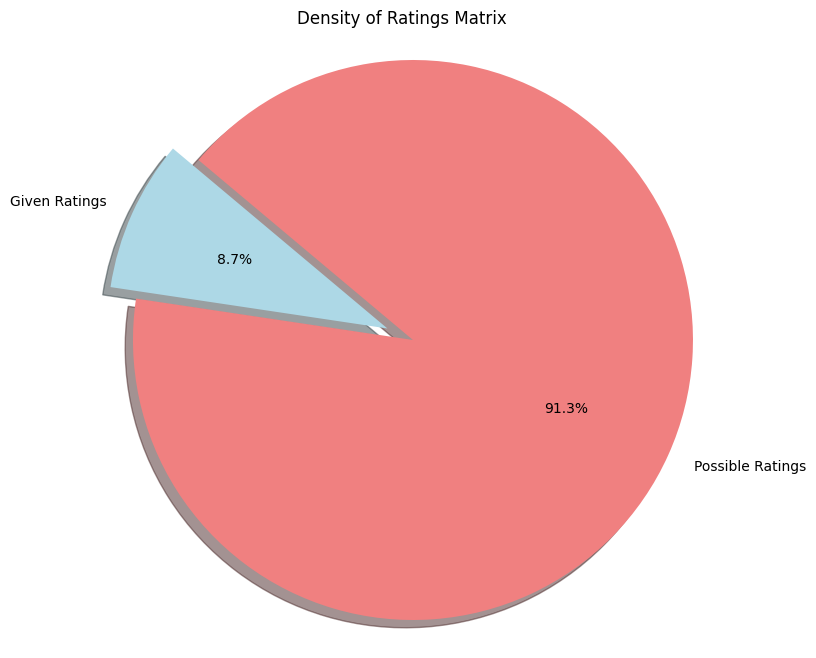

In [17]:
import matplotlib.pyplot as plt

# Tạo dữ liệu cho biểu đồ tròn
labels = ['Given Ratings', 'Possible Ratings']
sizes = [given_num_of_ratings, possible_num_of_ratings]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Tách một phần ra

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Density of Ratings Matrix')
plt.show()


In [43]:
average_rating = df_unique.groupby('product_id').mean()['score']

count_rating = df_unique.groupby('product_id').count()['score']

final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

final_rating = final_rating.sort_values(by='avg_rating',ascending=False)
final_rating.head()

,avg_rating,rating_count
product_id,,
275,5.0,1
72,5.0,1
101,5.0,1
106,5.0,1
133,5.0,1


In [19]:
def top_n_products(final_rating, n, min_interaction):

    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    return recommendations.index[:n]

In [44]:
list(top_n_products(final_rating, 5, 1))

[182, 25, 11, 219]

In [45]:
final_ratings_matrix['user_index'] = np.arange(1, final_ratings_matrix.shape[0] + 1)  
final_ratings_matrix.set_index(['user_index'], inplace=True)
final_ratings_matrix.head()


product_id,1,2,4,5,9,10,11,13,16,17,...,878,885,890,894,895,908,925,990,1006,1040
user_index,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def similar_users(user_index, interactions_matrix, num_iterations=10):
    similarity = []
    for user in range(1, interactions_matrix.shape[0]):

        similarity_score = []
        for _ in range(num_iterations):
            sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
            similarity_score.append(sim)

        avg_similarity_score = np.mean(similarity_score)

        similarity.append((user, avg_similarity_score))

    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity]
    similarity_score = [tup[1] for tup in similarity]

    return most_similar_users[1:], similarity_score[1:] 



In [48]:
similar = similar_users(43, final_ratings_matrix)[0][0:10]
similar

KeyError: 43

In [24]:
import numpy as np

# Đưa ma trận vào dưới dạng numpy array
matrix = np.array([
    [4, 0, 0, 0, 0, 0],
    [4, 5, 0, 5, 0, 0],
    [0, 5, 0, 4, 0, 3],
    [5, 4, np.nan, np.nan, np.nan, np.nan]  # Giá trị '?' được thay thế bằng np.nan
])

# Tính điểm số dự đoán cho người dùng cuối cùng
predicted_ratings = []

# Lặp qua mỗi sản phẩm trong ma trận
for item_index in range(matrix.shape[1]):
    if np.isnan(matrix[-1, item_index]):  # Nếu sản phẩm chưa được đánh giá bởi người dùng cuối cùng
        # Lọc ra các người dùng tương tự nhất và điểm số tương ứng
        similar_users, similarity_scores = similar_users(matrix.shape[0] - 1, matrix)
        
        # Tính toán điểm số dự đoán bằng trung bình có trọng số của các điểm số đã biết
        weighted_sum = 0
        total_similarity = 0
        for user, similarity in zip(similar_users, similarity_scores):
            if not np.isnan(matrix[user - 1, item_index]):  # Nếu người dùng tương tự đã đánh giá sản phẩm này
                weighted_sum += matrix[user - 1, item_index] * similarity
                total_similarity += similarity
        
        if total_similarity != 0:
            predicted_rating = weighted_sum / total_similarity
        else:
            predicted_rating = 0  # Trong trường hợp không có người dùng tương tự nào đã đánh giá sản phẩm
        
        predicted_ratings.append(predicted_rating)

print("Dự đoán điểm số cho người dùng cuối cùng:")
for item_index, rating in enumerate(predicted_ratings):
    print(f"Item {item_index + 1}: {rating:.2f}")

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [111]:
def recommendations(user_index, num_of_products, interactions_matrix):

    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []

    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:

            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break

    return recommendations[:num_of_products]


In [112]:
recommendations(105, 50, final_ratings_matrix)

[427,
 11,
 53,
 41,
 3,
 7,
 23,
 21,
 17,
 87,
 13,
 4,
 72,
 9,
 20,
 10,
 35,
 36,
 24,
 59,
 92,
 22,
 8,
 42,
 14,
 5,
 83,
 68,
 15,
 32,
 25,
 97,
 30,
 73,
 1,
 106,
 95,
 51,
 39,
 70,
 94,
 44,
 38,
 84,
 43,
 105,
 52,
 61,
 88,
 33]